In [1]:
from fastai.vision import *

In [8]:
path = untar_data(URLs.MNIST)

In [10]:
path.ls()

[PosixPath('/Users/tomoaki_ando/.fastai/data/mnist_png/training'),
 PosixPath('/Users/tomoaki_ando/.fastai/data/mnist_png/testing')]

In [154]:
bs = 128
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [74]:
data = (ImageList.from_folder(path, convert_mode='L')
                 .split_by_folder('training', 'testing')
                 .label_from_folder()
                 .transform(tfms)
                 .databunch(bs=bs).normalize())

In [3]:
rand_pad??

In [30]:
defaults.cmap='binary'

In [80]:
def conv2(ni, nf): return conv_layer(ni, nf, stride=2)
def conv_and_res(ni, nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [82]:
model = nn.Sequential(
    conv_and_res( 1,  8),
    conv_and_res( 8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [83]:
learn = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [104]:
data.train_ds[0][0].shape

torch.Size([1, 28, 28])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.57E-01
Min loss divided by 10: 8.32E-01


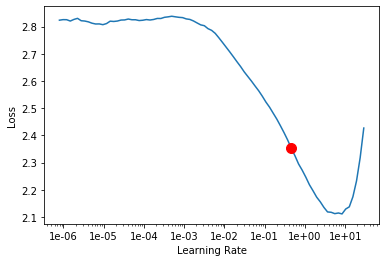

In [87]:
learn.lr_find(end_lr=100)
learn.recorder.plot(suggestion=True)

In [89]:
# min_grad_lr = learn.recorder.min_grad_lr
# min_grad_lr

0.45708818961487496

In [90]:
learn.fit_one_cycle(12, max_lr=.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.196429,0.104960,0.971100,00:24
1,0.123056,0.089489,0.973200,00:24
2,0.104049,0.185690,0.947200,00:26
3,0.078686,0.098957,0.968700,00:27
4,0.065168,0.055404,0.983100,00:27
5,0.062336,0.044068,0.986600,00:26
6,0.049014,0.043464,0.987300,00:25
7,0.042743,0.036354,0.988900,00:26
8,0.032510,0.027583,0.990500,00:25
9,0.025422,0.018916,0.994300,00:26


In [93]:
torch.save(learn.model.state_dict(), 'fastai_resnet.pt')